# Übung (Solution) : CNN MNIST Fashion

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

from keras_visualizer import visualizer
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint, TensorBoard

# Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Prepare the data

In [3]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# Reshaping -> add a dim for the channel dimension (CNN)
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)



In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1), name="MyConv1"), # input layer + Conv layer
    MaxPooling2D((2,2), name="MyMaxPool1") ,
    
    Conv2D(32, (3,3), activation="relu", name ="MyConv2"),
    MaxPooling2D((2,2), name="MyMaxPool2") ,

    Flatten(name ="MyFlatten1"),

    Dense(128,activation="relu", name="HDL1"),
    Dropout(0.5, name="MyDropOut"),
    Dense(10,activation="softmax", name = "MyOutput") # output layer

], "MyModelSeq")

In [10]:
model.summary()

Model: "MyModelSeq"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MyConv1 (Conv2D)            (None, 26, 26, 32)        320       
                                                                 
 MyMaxPool1 (MaxPooling2D)   (None, 13, 13, 32)        0         
                                                                 
 MyConv2 (Conv2D)            (None, 11, 11, 32)        9248      
                                                                 
 MyMaxPool2 (MaxPooling2D)   (None, 5, 5, 32)          0         
                                                                 
 MyFlatten1 (Flatten)        (None, 800)               0         
                                                                 
 HDL1 (Dense)                (None, 128)               102528    
                                                                 
 MyDropOut (Dropout)         (None, 128)               0

# Callbacks

In [11]:
my_callback_list =[
    EarlyStopping(patience=5, min_delta=0.0001),
    CSVLogger("./training_cnn.log"),
    ModelCheckpoint(filepath="./models/cnn_{epoch:02d}_{val_loss:.2f}.keras")    
]

# Train the model

In [12]:
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 64

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss= "categorical_crossentropy",
              metrics = ["accuracy"])

history = model.fit(x_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=my_callback_list)



Epoch 1/10


750/750 [==============================] - 14s 16ms/step - loss: 0.6370 - accuracy: 0.7708 - val_loss: 0.4177 - val_accuracy: 0.8487
Epoch 2/10
750/750 [==============================] - 12s 16ms/step - loss: 0.4267 - accuracy: 0.8487 - val_loss: 0.3538 - val_accuracy: 0.8672
Epoch 3/10
750/750 [==============================] - 13s 17ms/step - loss: 0.3734 - accuracy: 0.8649 - val_loss: 0.3206 - val_accuracy: 0.8806
Epoch 4/10
750/750 [==============================] - 13s 17ms/step - loss: 0.3394 - accuracy: 0.8770 - val_loss: 0.3181 - val_accuracy: 0.8847
Epoch 5/10
750/750 [==============================] - 14s 18ms/step - loss: 0.3162 - accuracy: 0.8853 - val_loss: 0.2840 - val_accuracy: 0.8941
Epoch 6/10
750/750 [==============================] - 14s 18ms/step - loss: 0.3024 - accuracy: 0.8909 - val_loss: 0.2747 - val_accuracy: 0.8981
Epoch 7/10
750/750 [==============================] - 13s 17ms/step - loss: 0.2839 - accuracy: 0.8964 - val_loss: 0.2714 - val_accurac

# Evaluate the model

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 89.79%


# Predict

In [15]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 2s 5ms/step


array([[3.0248941e-09, 7.4391347e-11, 9.4740937e-10, ..., 4.2010477e-04,
        1.4982168e-09, 9.9957711e-01],
       [2.1433477e-06, 1.2944118e-12, 9.9786806e-01, ..., 1.2793003e-15,
        9.3477071e-10, 7.9492484e-13],
       [2.2897829e-11, 1.0000000e+00, 1.5268570e-13, ..., 5.0418258e-21,
        9.1708181e-15, 7.7164652e-18],
       ...,
       [5.3212329e-07, 2.0331590e-09, 9.2712625e-08, ..., 1.1104324e-09,
        9.9999106e-01, 2.5130698e-09],
       [1.2272368e-08, 9.9999630e-01, 2.7611063e-10, ..., 1.4441248e-13,
        3.6421224e-11, 5.2139534e-12],
       [5.3659409e-05, 5.8638411e-06, 6.5548171e-05, ..., 1.5317257e-02,
        1.3467325e-03, 3.0691342e-03]], dtype=float32)

# Visualize the results

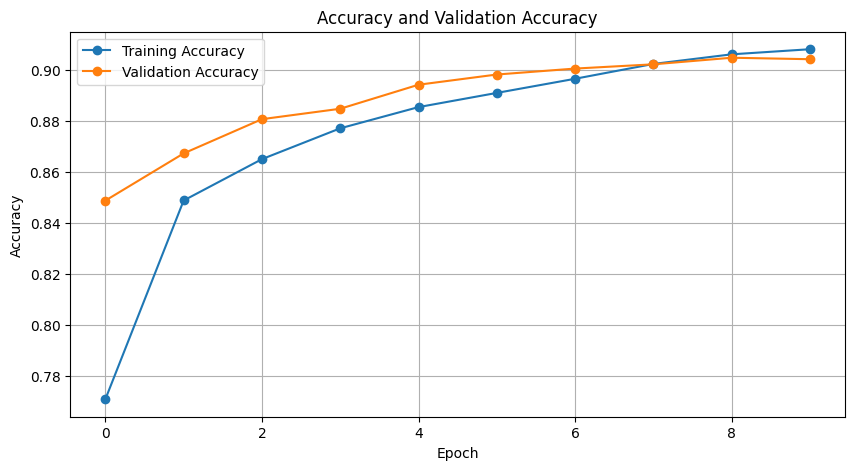

In [16]:
# Plot accuracy and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Visualize the model Architecture

In [20]:
from keras_visualizer import visualizer

visualizer(model, file_name= "./cnn_fashionmnist_network", file_format= "pdf")

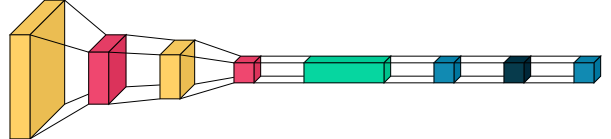

In [18]:
import visualkeras

visualkeras.layered_view(model, spacing=50)